# Problem Statement:

Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

# Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.



# Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), 
as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

There are 25 variables:

    ID: ID of each client
    
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    
    SEX: Gender (1=male, 2=female)
    
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    
    AGE: Age in years
    
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    
    PAY_2: Repayment status in August, 2005 (scale same as above)
    
    PAY_3: Repayment status in July, 2005 (scale same as above)
    
    PAY_4: Repayment status in June, 2005 (scale same as above)
    
    PAY_5: Repayment status in May, 2005 (scale same as above)
    
    PAY_6: Repayment status in April, 2005 (scale same as above)
    
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    
    default.payment.next.month: Default payment (1=yes, 0=no)



# IMPORT LIBRARIES

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
credit_data=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
credit_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


from pandas_profiling import ProfileReport
profile = ProfileReport(credit_data)
profile

In [4]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
credit_data.shape

(30000, 25)

In [6]:
print("Features names: ",credit_data.columns)
print(3*'\n')
print("Number of rows and columns: ", credit_data.shape)

Features names:  Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')




Number of rows and columns:  (30000, 25)


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
credit_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# EDA

In [ ]:
credit_data.drop('ID', axis = 1, inplace =True) # drop column "ID"

In [ ]:
credit_data.columns

Numbers of null values in credit_data's every variables: ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64











<AxesSubplot:>

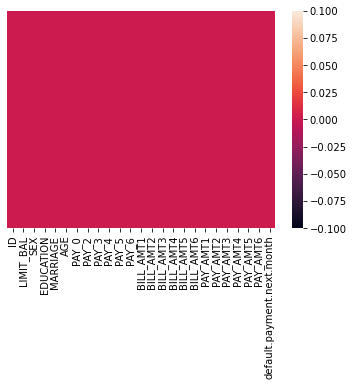

In [9]:
print("Numbers of null values in credit_data's every variables:",credit_data.isnull().sum())
print(8*"\n")
sns.heatmap(credit_data.isnull(),yticklabels=False)
# heat map used to checke whether there is null value or not

In [36]:
#-------------------------loops for known which variable under categorical columns


category_features = []
threshold = 10
for each in credit_data.columns:
    if credit_data[each].nunique() < threshold:
        category_features.append(each)

for each in category_features:
    credit_data[each] = credit_data[each].astype('category')
    

category_features 

['SEX', 'EDUCATION', 'MARRIAGE', 'def_pay']

In [11]:
credit_data.select_dtypes(include=['category','int']).dtypes

ID                            int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
default.payment.next.month    int64
dtype: object

In [12]:
credit_data.select_dtypes(include=['category','int','float']).dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [18]:
#unique value


print("1-SEX:",credit_data['SEX'].unique())
print(1*"\n")
print(credit_data['SEX'].value_counts())
print(1*"\n")
print("2-EDUCATION: ",credit_data['EDUCATION'].unique())
print(1*"\n")
print(credit_data['EDUCATION'].value_counts())
print(1*"\n")
print("3-MARRIAGE:",credit_data['MARRIAGE'].unique())
print(1*"\n")
print(credit_data['MARRIAGE'].value_counts())
print(1*"\n")
print("4-default.payment.next.month:",credit_data['default.payment.next.month'].unique())
print(1*"\n")
print(credit_data['default.payment.next.month'].value_counts())

1-SEX: [2, 1]
Categories (2, int64): [1, 2]


2    18112
1    11888
Name: SEX, dtype: int64


2-EDUCATION:  [2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


3-MARRIAGE: [1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


4-default.payment.next.month: [1, 0]
Categories (2, int64): [0, 1]


0    23364
1     6636
Name: default.payment.next.month, dtype: int64


In [ ]:
#-------------------------loops for known which variable under categorical columns


category_features = []
threshold = 20
for each in credit_data.columns:
    if credit_data[each].nunique() < threshold:
        category_features.append(each)

for each in category_features:
    credit_data[each] = credit_data[each].astype('category')
    

category_features 

In [19]:
print("1-PAY_0:",credit_data['PAY_0'].unique())
print(1*"\n")
print(credit_data['PAY_0'].value_counts())

print(1*"\n")

print("2-PAY_2: ",credit_data['PAY_2'].unique())
print(1*"\n")
print(credit_data['PAY_2'].value_counts())

print(1*"\n")

print("2-PAY_3: ",credit_data['PAY_3'].unique())
print(1*"\n")
print(credit_data['PAY_3'].value_counts())

print(1*"\n")



1-PAY_0: [2, -1, 0, -2, 1, ..., 4, 8, 7, 5, 6]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]


0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_0, dtype: int64


2-PAY_2:  [2, 0, -1, -2, 3, ..., 7, 4, 1, 6, 8]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]


0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64


2-PAY_3:  [-1, 0, 2, -2, 3, ..., 6, 7, 1, 5, 8]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]


0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64




In [20]:
print("2-PAY_4: ",credit_data['PAY_4'].unique())
print(1*"\n")
print(credit_data['PAY_4'].value_counts())

print(1*"\n")

print("2-PAY_5: ",credit_data['PAY_5'].unique())
print(1*"\n")
print(credit_data['PAY_5'].value_counts())

print(1*"\n")

print("2-PAY_6: ",credit_data['PAY_6'].unique())
print(1*"\n")
print(credit_data['PAY_6'].value_counts())

2-PAY_4:  [-1, 0, -2, 2, 3, ..., 5, 7, 6, 1, 8]
Length: 11
Categories (11, int64): [-2, -1, 0, 1, ..., 5, 6, 7, 8]


0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64


2-PAY_5:  [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
Categories (10, int64): [-2, -1, 0, 2, ..., 5, 6, 7, 8]


0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64


2-PAY_6:  [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
Categories (10, int64): [-2, -1, 0, 2, ..., 5, 6, 7, 8]


0     16286
-1     5740
-2     4895
2      2766
3       184
4        49
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64


### EDUCATION: The categories 4:others, 5:unknown, and 6:unknown and 0 can be grouped into a single class '4'.

In [21]:
credit_data['EDUCATION']=np.where(credit_data['EDUCATION'] == 5, 4, credit_data['EDUCATION'])
credit_data['EDUCATION']=np.where(credit_data['EDUCATION'] == 6, 4, credit_data['EDUCATION'])
credit_data['EDUCATION']=np.where(credit_data['EDUCATION'] == 0, 4, credit_data['EDUCATION'])


### After grouping, the education column has the following categories:

In [22]:

credit_data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [23]:
credit_data['EDUCATION'].value_counts(dropna=False)

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'.

In [24]:
credit_data['MARRIAGE'].unique()

[1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

In [25]:
credit_data['MARRIAGE']=np.where(credit_data['MARRIAGE'] == 0, 3,credit_data['MARRIAGE'])

In [26]:
credit_data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [27]:
credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [28]:
credit_data = credit_data.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})

In [29]:
credit_data 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
credit_data.describe().T # stat tool use to check the stat analysisi

# Credit_data Visualization

In [30]:
credit_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

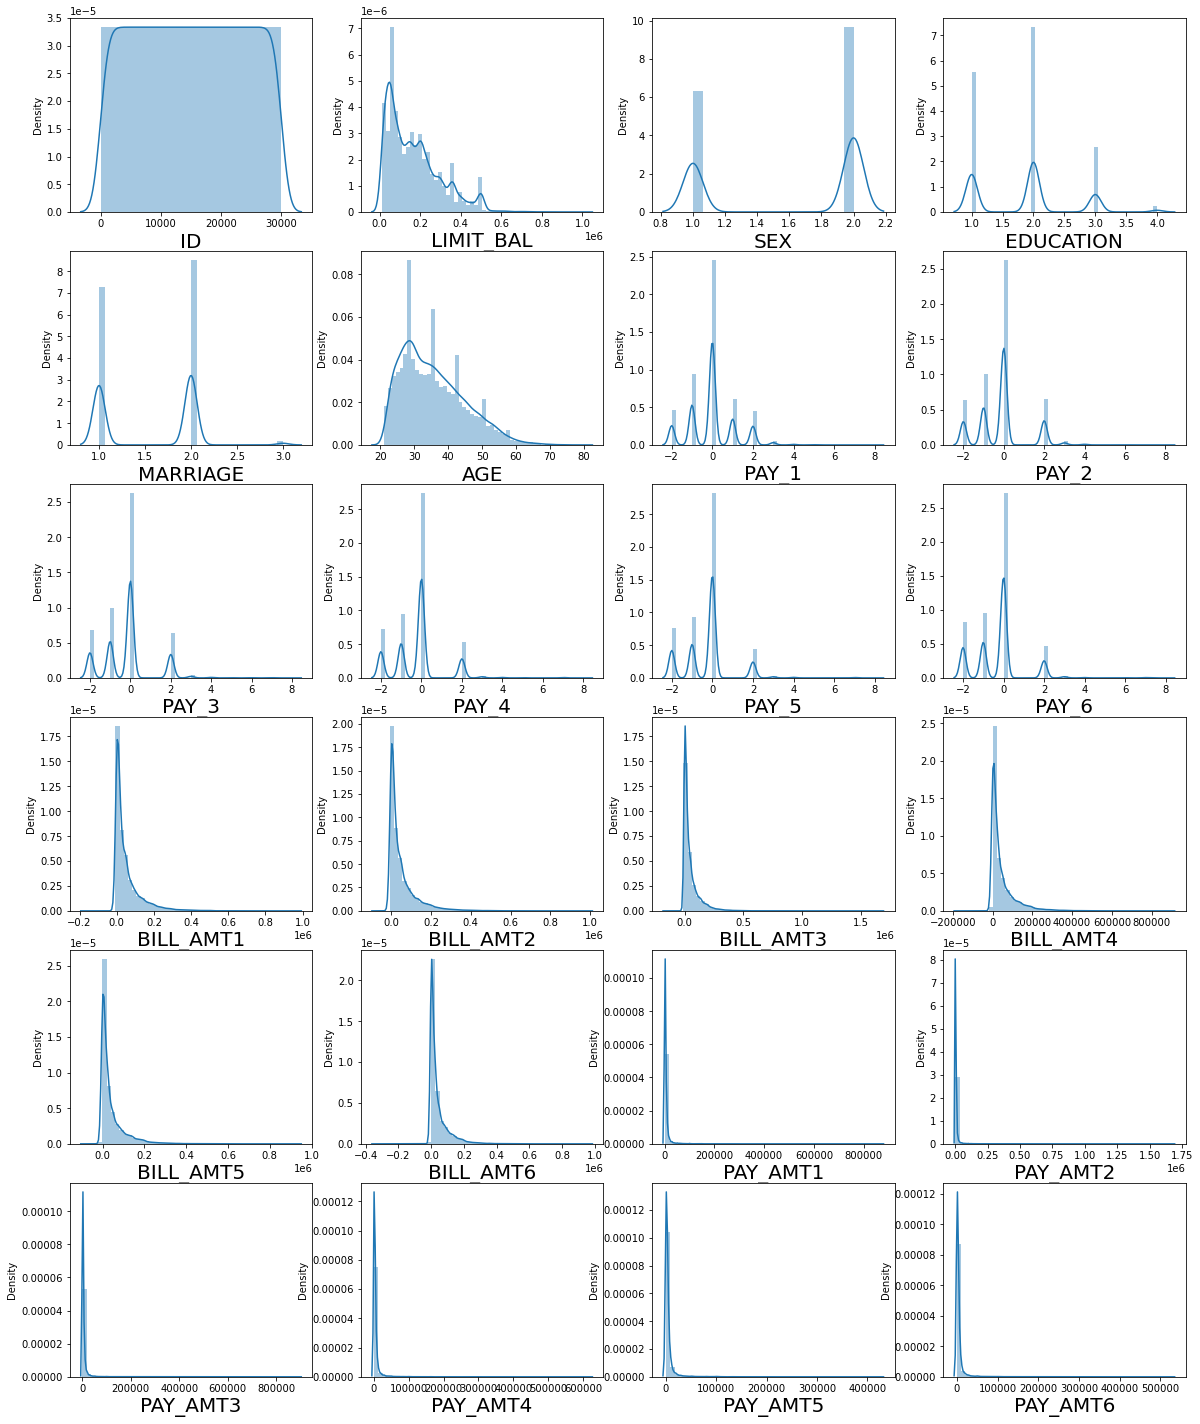

<Figure size 432x288 with 0 Axes>

In [31]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in credit_data:
    if plotnumber<=24 :     # as there are 24 columns in the data
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(credit_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

plt.savefig('Distribution plot.png')

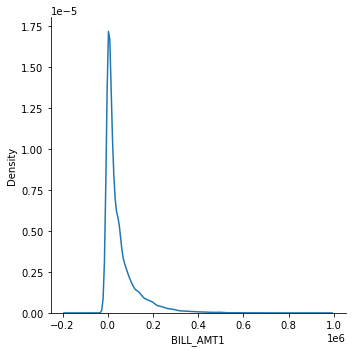

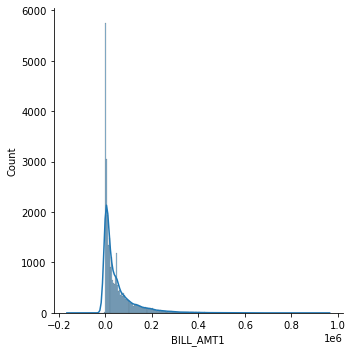

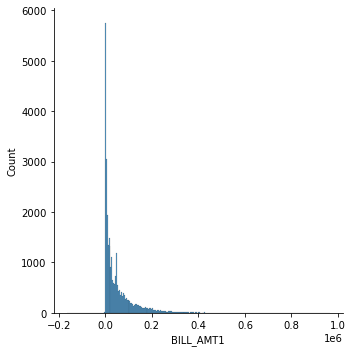

In [45]:
sns.displot(credit_data, x="BILL_AMT1", kind="kde")
sns.displot(credit_data, x="BILL_AMT1",kde=True)
sns.displot(credit_data, x="BILL_AMT1")

<AxesSubplot:xlabel='BILL_AMT1'>

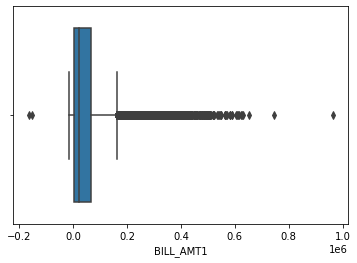

In [48]:
#credit_data.hist(column='BILL_AMT1', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
sns.boxplot(x=credit_data["BILL_AMT1"])

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in credit_data:
    if plotnumber<=24 :     # as there are 24 columns in the data
        ax = plt.subplot(6,4,plotnumber)
        sns.histplot(credit_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

plt.savefig('Histogram plot.png')

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in credit_data:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(predict_car[column], predict_car["def_pay"])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

plt.savefig('scatter plot.png')

# BAR PLOT

In [ ]:
#default.payment.next.month: Default payment (1=yes, 0=no)

# Stacked barplot with pandas
YES = credit_data.loc[credit_data['def_pay']==1, :]['def_pay'].value_counts()
NO     = credit_data.loc[credit_data['def_pay']==0, :]['def_pay'].value_counts()
credit_data_plot  = pd.DataFrame([YES,NO])
credit_data_plot.index=["YES","NO"]

# Plot
credit_data_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

In [ ]:
credit_data.columns

In [ ]:
#SEX: Gender (1=male, 2=female)
# Stacked barplot with pandas
MALE = credit_data.loc[credit_data['SEX']==1, :]['SEX'].value_counts()
FEMALE     = credit_data.loc[credit_data['SEX']==2, :]['SEX'].value_counts()
credit_data_plot  = pd.DataFrame([MALE,FEMALE])
credit_data_plot.index=["MALE","FEMALE"]

# Plot
credit_data_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

In [ ]:
# Stacked barplot with pandas with differnt palette
MALE = credit_data.loc[credit_data['SEX']==1, :]['def_pay'].value_counts()
FEMALE     = credit_data.loc[credit_data['SEX']==2, :]['def_pay'].value_counts()

credit_data_plot  = pd.DataFrame([MALE,FEMALE])
credit_data_plot.index=["MALE","FEMALE"]


# Bar plot
credit_data_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');

In [ ]:
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# Stacked barplot with pandas with differnt palette
graduate_school = credit_data.loc[credit_data['EDUCATION']==1, :]['def_pay'].value_counts()
university     = credit_data.loc[credit_data['EDUCATION']==2, :]['def_pay'].value_counts()
high_school= credit_data.loc[credit_data['EDUCATION']==3, :]['def_pay'].value_counts()
others= credit_data.loc[credit_data['EDUCATION']==4, :]['def_pay'].value_counts()
credit_data_plot  = pd.DataFrame([graduate_school,university,high_school,others])
credit_data_plot.index=["graduate schoo","university","high school","others"]


# Bar plot
credit_data_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');

In [ ]:
# Stacked barplot with pandas with differnt palette
graduate_school = credit_data.loc[credit_data['EDUCATION']==1, :]['SEX'].value_counts()
university     = credit_data.loc[credit_data['EDUCATION']==2, :]['SEX'].value_counts()
high_school= credit_data.loc[credit_data['EDUCATION']==3, :]['SEX'].value_counts()
others= credit_data.loc[credit_data['EDUCATION']==4, :]['SEX'].value_counts()
credit_data_plot  = pd.DataFrame([graduate_school,university,high_school,others])
credit_data_plot.index=["graduate schoo","university","high school","others"]


# Bar plot
credit_data_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');

# Outlier Detection:

In [ ]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=credit_data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
credit_data.columns

In [ ]:
data=credit_data[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
# create a box plot
fig , ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax = ax.flatten()

for col, value in data.items():
    sns.boxplot(y=col,data= credit_data, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

# function to create diagnostic plots

In [ ]:
def plotvarible(df, variable):
    plt.figure(figsize=(16,4))
    
    #Histogram
    
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)
    
    #boxplot
    
    plt.subplot(1,2,2)
    plt.boxplot(df[variable])
    plt.show()
    
    

In [ ]:
plotvarible(credit_data, "LIMIT_BAL")

In [ ]:
plotvarible(credit_data, "BILL_AMT1")

In [ ]:
plotvarible(credit_data, "BILL_AMT2")

In [ ]:
plotvarible(credit_data, "BILL_AMT3")

In [ ]:
plotvarible(credit_data, "BILL_AMT4")

In [ ]:
plotvarible(credit_data, "BILL_AMT5")

In [ ]:
plotvarible(credit_data, "BILL_AMT6")

In [ ]:
plotvarible(credit_data, "PAY_AMT1")

In [ ]:
plotvarible(credit_data, "PAY_AMT2")

In [ ]:
plotvarible(credit_data, "PAY_AMT3")

In [ ]:
plotvarible(credit_data, "PAY_AMT4")

In [ ]:
plotvarible(credit_data, "PAY_AMT5")

In [ ]:
plotvarible(credit_data, "PAY_AMT6")

In [ ]:
data

In [ ]:
for col in data:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)

    IQR=Q3-Q1

    upper_limit= Q3+1.5*IQR
    lower_limit= Q1-1.5*IQR

    top_median= float(data[col].median())
    down_median= float(data[col].median())

    data[col]=np.where(data[col]>=upper_limit,top_median,data[col])
    data[col]=np.where(data[col]<=lower_limit,down_median,data[col]) 

In [ ]:
def fixoutliers(x):

    ##Get all the column name from the input dataframe x
    xColumnNames=x.columns
    print(xColumnNames)
    #for j in df2ColumnNames:

    for j in xColumnNames:
        try:
            print("colnames ",j)
            xy=x[j]    
            mydata=pd.DataFrame()
            #print(xy)
            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR
            for i in xy:
                if(i>maximum):
                    print("Entering maxim")
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    print("enterinf minimum")
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)
            x[j]=updated
        except:
            continue
    return x

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
plotvarible(data, "PAY_AMT6")

# Feature Selection- Correlation

In [ ]:
# Finding out the correlation between the features
corr = credit_data.corr()
corr

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

plt.savefig('correlation Heatmap plot.png')

A heat map is a two-dimensional representation of data in which values are represented by colors. Correlation Heat map is a two dimensional plot of the amount of correlation (measure of dependence) between variables represented by colors. The varying intensity of color represents the measure of correlation. Correlation is a measure of linear relationship between two variables. Correlation between two variables can also be determined using scatter plot between these two variables. When there are multiple variables, and we want to find the correlation between all of them, a matrix data structure called correlation matrix is used. Correlation values ranges from -1 to +1.

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = credit_data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(credit_data, 0.70)

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers  # Driver code

median = np.median(sample) # Replace with median

for i in sample_outliers:
    
    c = np.where(sample==i, 14, sample)
    
print("Sample: ", sample)

In [ ]:
def detect_outliers_iqr(data):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=Q3-Q1
    #Calculating minimum threshold
    min=q25-(1.5*IQR)
    max=q75+(1.5*IQR)
    #Calculating maximum threshold
    for i in x:
        if x[i] > max:
            x[i].replace(x[i],dt)
        elif x[i] < min:
            x[i].replace(x[i],q5)
        else:
            x[i]
    print(q5,q25,q75,dt,min,max)

    return